In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow.keras 

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2

In [ ]:
from tqdm import tqdm 

In [ ]:
import os

In [ ]:
import re

In [ ]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)

In [ ]:
SIZE = 256

In [ ]:
image_path = 'photos'
img_array = []

In [ ]:
sketch_path = 'sketches'
sketch_array = []

In [ ]:
image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))

In [ ]:
for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0 
    img_array.append(img_to_array(image))
    img1 = cv2.flip(image,1)
    img_array.append(img_to_array(img1))
    img2 = cv2.flip(image,-1)
    img_array.append(img_to_array(img2))
    img3 = cv2.flip(image,-1)
    img3 = cv2.flip(img3,1)
    img_array.append(img_to_array(img3)) 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(img_to_array(img4))
    img5 = cv2.flip(img4,1)
    img_array.append(img_to_array(img5)) 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(img_to_array(img6))
    img7 = cv2.flip(img6,1)
    img_array.append(img_to_array(img7))

In [2]:
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (SIZE, SIZE))
    image = image.astype('float32') / 255.0
    sketch_array.append(img_to_array(image))
    img1 = cv2.flip(image,1)
    sketch_array.append(img_to_array(img1))
    img2 = cv2.flip(image,-1)
    sketch_array.append(img_to_array(img2)
    img3 = cv2.flip(image,-1)
    img3 = cv2.flip(img3,1)
    sketch_array.append(img_to_array(img3))
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(img_to_array(img4))
    img5 = cv2.flip(img4,1)
    sketch_array.append(img_to_array(img5))
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(img_to_array(img6))
    img7 = cv2.flip(img6,1)
    sketch_array.append(img_to_array(img7))

100%|████████████████████████████████████████████████████████████████████████████████| 188/188 [00:05<00:00, 33.04it/s]


In [3]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 1504
Total number of images: 1504


In [4]:
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
   
    plt.show()

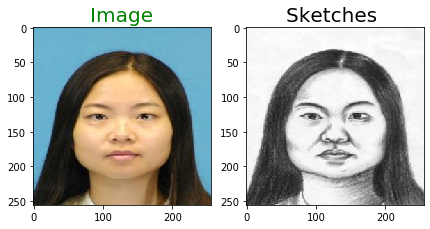

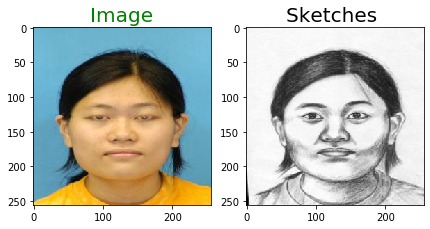

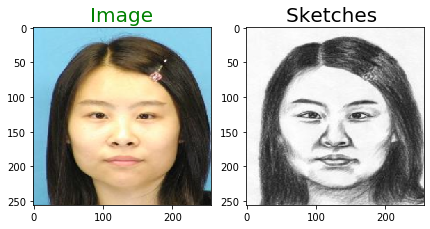

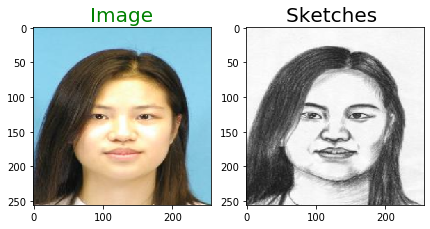

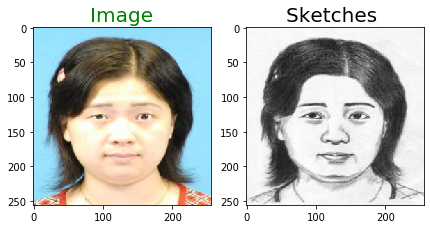

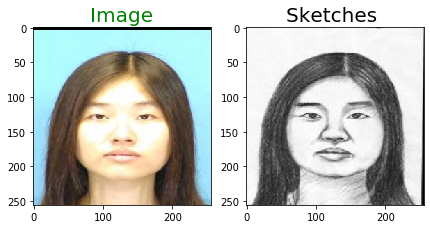

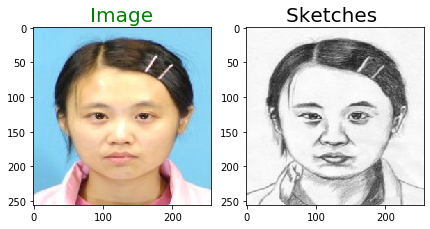

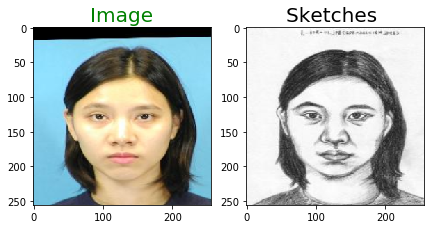

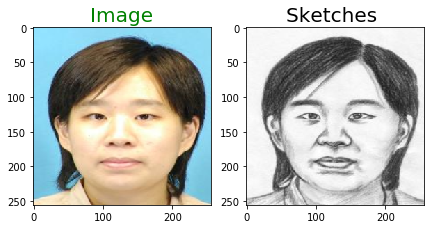

In [5]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])


In [ ]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]

In [ ]:
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]

In [ ]:
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)

In [ ]:
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

In [ ]:
encoder_input = tensorflow.keras.Input(shape=(SIZE,SIZE, 3), name="img")
x = Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_input)
x = MaxPool2D(pool_size = (2,2))(x)

In [ ]:
x = Conv2D(filters = 32,kernel_size = (3,3),strides = (2,2), activation = 'relu', padding = 'valid')(x)
x = Conv2D(filters = 64, kernel_size = (3,3), strides = (2,2), activation = 'relu', padding = 'same')(x)
x = MaxPool2D(pool_size = (2,2))(x)

In [ ]:
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 256 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
encoder_output = Conv2D(filters = 512 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x) 
encoder = tf.keras.Model(encoder_input, encoder_output)

In [ ]:
decoder_input = Conv2D(filters = 512 ,kernel_size = (3,3), activation = 'relu', padding = 'same')(encoder_output)
x = UpSampling2D(size = (2,2))(decoder_input)
x = Conv2D(filters = 256, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)

In [ ]:
x = Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)
x = Conv2D(filters = 32 , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
x = UpSampling2D(size = (2,2) )(x)

In [ ]:
x = Conv2D(filters = 16  , kernel_size = (3,3), activation = 'relu', padding = 'same')(x)
decoder_output = Conv2D(filters = 3, kernel_size = (3,3), activation = 'relu', padding = 'same')(x)

In [7]:
model = tensorflow.keras.Model(encoder_input, decoder_output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       7385

In [8]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

model.fit(train_image, train_sketch_image, epochs = 50)

Epoch 1/50
44/44 [==============================] - 412s 9s/step - loss: 1.0754 - acc: 0.0850
Epoch 2/50
44/44 [==============================] - 403s 9s/step - loss: 0.1905 - acc: 0.3708
Epoch 3/50
44/44 [==============================] - 426s 10s/step - loss: 0.1143 - acc: 0.2373
Epoch 4/50
44/44 [==============================] - 416s 9s/step - loss: 0.1100 - acc: 0.3130
Epoch 5/50
44/44 [==============================] - 413s 9s/step - loss: 0.0973 - acc: 0.3439
Epoch 6/50
44/44 [==============================] - 409s 9s/step - loss: 0.0881 - acc: 0.3767
Epoch 7/50
44/44 [==============================] - 422s 10s/step - loss: 0.0866 - acc: 0.3924
Epoch 8/50
44/44 [==============================] - 436s 10s/step - loss: 0.0870 - acc: 0.3864
Epoch 9/50
44/44 [==============================] - 440s 10s/step - loss: 0.0830 - acc: 0.4172
Epoch 10/50
44/44 [==============================] - 431s 10s/step - loss: 0.0859 - acc: 0.3740
Epoch 11/50
44/44 [==============================] - 4

In [9]:
prediction_on_test_data = model.evaluate(test_image, test_sketch_image)
print("Loss: ", prediction_on_test_data[0])
print("Accuracy: ", np.round(prediction_on_test_data[1] * 100,1))

4/4 [==============================] - 10s 1s/step - loss: 0.0767 - acc: 0.7855
Loss:  0.07674188911914825
Accuracy:  78.6


In [10]:
def show_images(real,sketch, predicted):
    plt.figure(figsize = (9,9))
    plt.subplot(1,3,1)
    plt.title("Predicted",fontsize = 15, color = 'Lime')
    plt.imshow(real)
    plt.subplot(1,3,2)
    plt.title("sketch",fontsize = 15, color = 'Blue')
    plt.imshow(sketch)
    plt.subplot(1,3,3)
    plt.title("Image",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

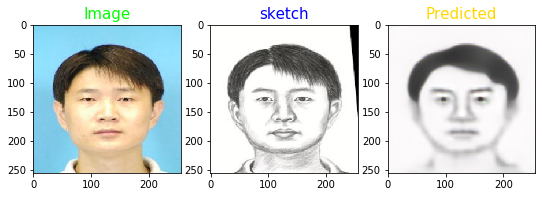

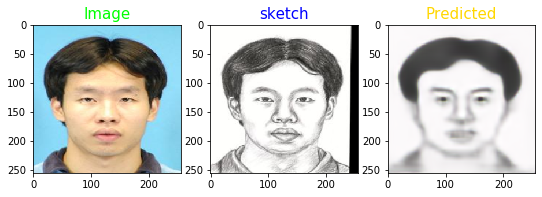

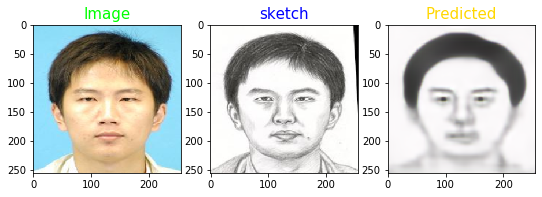

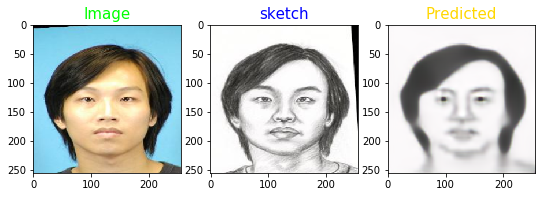

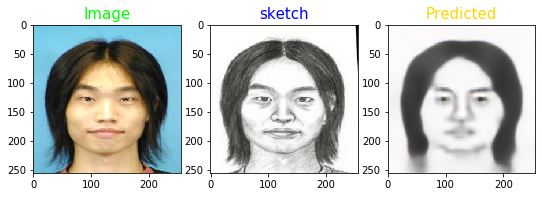

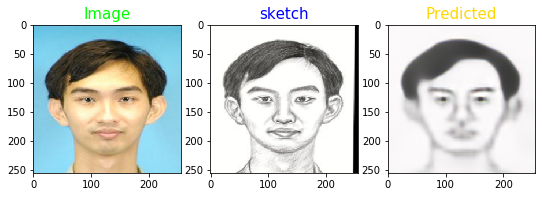

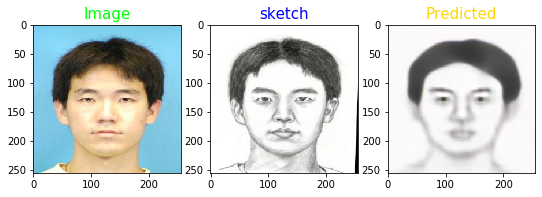

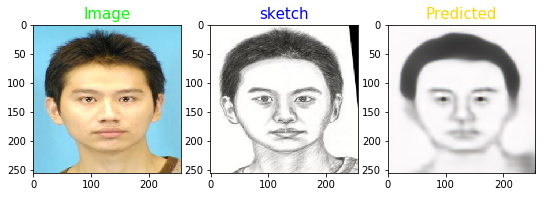

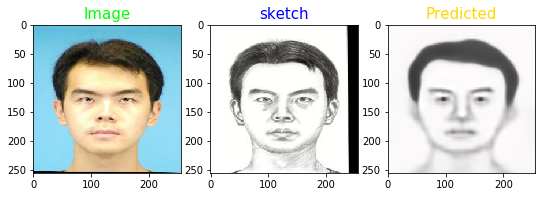

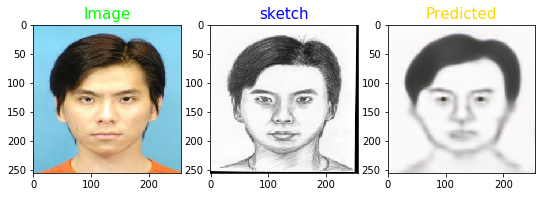

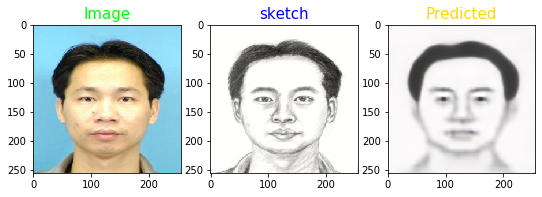

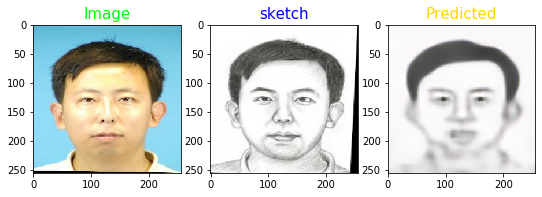

In [11]:
ls = [i for i in range(0,95,8)]
for i in ls:
    predicted =np.clip(model.predict(test_image[i].reshape(1,SIZE,SIZE,3)),0.0,1.0).reshape(SIZE,SIZE,3)
    show_images(test_image[i],test_sketch_image[i],predicted)